### UMAP

A critical difference between t-SNE and UMAP is that t-SNE minimize the KL-divergence whereas UMAP minimizes the Cross-entropy, this has very different effect in global structure preservation.

* [Documentation](https://umap-learn.readthedocs.io/en/latest/)
* Reference paper: [UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction](https://arxiv.org/abs/1802.03426) (McInnes, L, Healy, J)

#### Importing Packages

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn import metrics
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#conda install -c conda-forge umap-learn
#pip install umap-learn
import umap

import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(16,10)})

#### Loading **MNIST** Dataset

In [2]:
mnist = fetch_openml('mnist_784')
color = mnist.target.astype(int)

#### Compute the 2D embedding with **UMAP**

In [3]:
%%time

reducer = umap.UMAP(random_state=42, n_neighbors=50, min_dist=0.05)
embedding = reducer.fit_transform(mnist.data)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


CPU times: user 2min 19s, sys: 6.36 s, total: 2min 25s
Wall time: 1min 10s


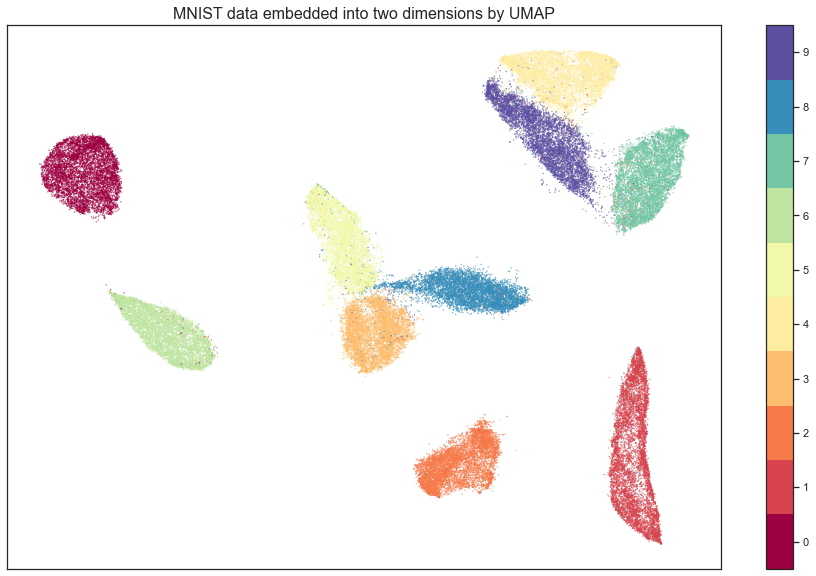

In [4]:
fig, ax = plt.subplots()
plt.scatter(embedding[:, 0], embedding[:, 1], c=color, cmap="Spectral", s=.1)
plt.setp(ax, xticks=[], yticks=[])
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title("MNIST data embedded into two dimensions by UMAP", fontsize=16)

plt.show()

#### Compute the 3D embedding with **UMAP**

In [5]:
%%time

reducer_3d = umap.UMAP(random_state=42, n_components=3)
embedding_3d = reducer_3d.fit_transform(mnist.data)

CPU times: user 1min, sys: 5.58 s, total: 1min 5s
Wall time: 34.3 s


/var/folders/94/c8xx6tzx12ldq9gfh_rxy1sh0000gn/T/ipykernel_94820/2441165417.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure().gca(projection='3d')


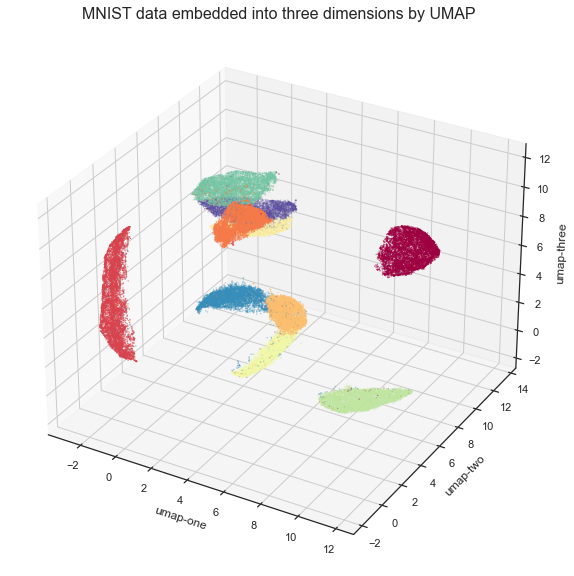

In [6]:
ax = plt.figure().gca(projection='3d')
ax.scatter(
    xs=embedding_3d[:,0],
    ys=embedding_3d[:,1],
    zs=embedding_3d[:,2],
    c=color, 
    cmap='Spectral',
    s=.1)
ax.set_xlabel('umap-one')
ax.set_ylabel('umap-two')
ax.set_zlabel('umap-three')

plt.title("MNIST data embedded into three dimensions by UMAP", fontsize=16)
plt.show()

### Clustering in the embedded space

In [7]:
def cluster_mnist(data):
    kmeans = KMeans(n_clusters=np.unique(mnist.target).size).fit(data)
    labels_preds = kmeans.predict(data)
    homogeneity = metrics.homogeneity_score(mnist.target, labels_preds)
    completeness = metrics.completeness_score(mnist.target, labels_preds)
    v_score = metrics.v_measure_score(mnist.target, labels_preds)
    print(f"homogeneity | completness | v_score")
    print(f"{homogeneity:>11.3f} | {completeness:>11.3f} | {v_score:>7.3f}")

In [8]:
cluster_mnist(mnist.data)

homogeneity | completness | v_score
      0.483 |       0.485 |   0.484


In [9]:
cluster_mnist(embedding)

homogeneity | completness | v_score
      0.830 |       0.848 |   0.838


In [10]:
cluster_mnist(embedding_3d)

homogeneity | completness | v_score
      0.835 |       0.854 |   0.844


In [11]:
def cluster_hdbscan(data):
    import hdbscan
    cluster = hdbscan.HDBSCAN()
    cluster.fit(data)
    labels_preds = cluster.labels_
    homogeneity = metrics.homogeneity_score(mnist.target, labels_preds)
    completeness = metrics.completeness_score(mnist.target, labels_preds)
    v_score = metrics.v_measure_score(mnist.target, labels_preds)
    print(f"homogeneity | completness | v_score")
    print(f"{homogeneity:>11.3f} | {completeness:>11.3f} | {v_score:>7.3f}")

In [12]:
cluster_hdbscan(mnist.data)

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
cluster_mnist(embedding)

In [ ]:
cluster_mnist(embedding_3d)

### Clustering results
As expected, clustering in a smaller embedded space gives much better results in cluster homogeneity and completness.
However, we can see already that more dimensions is not necesserly a guarantee in clustering quality when using a non-linear embedding process such as UMAP (KMeans use Euclidean distance metric)